#Spotify y sus recomendaciones:

Escogimos el dataset de spotify ya que es una fuente de datos en constante crecimiento y una de las aplicaciones mas recurridas a nivel mundial por su simple y útil función de ofrecer musica vía streaming. Desde el desde el año 2006 cuenta con al menos 345 millones de usuarios activos y 155 millones de ellos son usuarios de spotify Premium.

La principal motivación de este trabajo se puede dividir en dos. Por un lado, se intentó desarrollar un modelo de regresión lineal que permitiera predecir los niveles de popularidad que alcanzaría una canción en base a algún subconjunto de las variables que se incluyen en nuestro DataSet inicial. 

Este enfoque fracasó al momento de corroborar, por dos vías diferentes que no es posible construir un modelo de regresión lineal que explique lo suficiente la variabilidad de la variable respuesta elegida "Popularidad".

Luego, nuestro enfoque complementario fue intentar utilizar algoritmos de clasificación, primero identificando las principales variables que contribuyen a la asignación del género para cada canción, y luego directamente intentamos construir un modelo que clasificara las canciones siguiendo los criterios de Spotify con una tasa aceptable de éxito.

De esta manera, una vez identificadas las principales variables que inluencian la selección de géneros, y habiendo analizado aquellos más populares por ejemplo, se pueden sacar algunas conclusiones respecto a las preferencias musicales del público que utiliza Spotify (siendo que el DataSet utilizado recopila las canciones más populares de la plataforma).

Nos parece fundamental medir el interés de las personas hacia la música respecto a los géneros musicales, ver cómo influye a los géneros el ritmo, nivel de sonido, incluso la clave, o "key", en que está compuesta una canción permitiendo saber hacia dónde la poblacion se inclina al momento de escoger una canción y ver si los rangos de dichas variables son influencias proporcionales al momento de definir un género y asimismo un gusto musical.

En base a esto, se puede trabajar en una selección para futuros proyectos de artistas o producción y utilizarse esto a modo de pequeños insights a la hora de crear música. 

A modo de ejemplo, esta información en temas de producción le resultaría de utilidad a un productor o incluso al mismo artista al momento de trabajar en su música conociendo la demanda del público, y con qué género se estaría identificando la música que crea.





# Objetivo:

El principal objetivo de este proyecto sería utilizar un algoritmo que nos permita predecir el género que le sería asignada a una canción utilizando el dataset basado en la API de Spotify y las canciones más populares de dicha plataforma. 

De esta manera, una vez identificado cada género se podría comenzar a observar distintos detalles dentro de cada uno, como puede ser la tonalidad de la composición, la valencia, el ritmo y la clave en que están compuestos aquellos hits.

Esta información valiosa se podría luego utilizar a la hora de predecir la probabilidad de que artistas o canciones nuevas **alcancen** niveles altos de popularidad a la vez que podría llegar a considerarse una guía sobre factores clave que logran que dichas canciones lleguen a posicionarse en estas listas de popularidad.

In [ ]:
# importación de las librerias necesarias
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

In [ ]:
#usamos pandas para leer este csv desde el archivo RAW en GitHub

url= 'https://raw.githubusercontent.com/StefanoTortone/CoderhouseDataScience/main/music_genre.csv'
dfs = pd.read_csv(url)
dfs.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [ ]:
#definimos el nuevo indice
dfs.index = dfs['music_genre']
dfs = dfs.drop('music_genre', axis='columns')
dfs

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence
music_genre,,,,,,,,,,,,,,,,,
Electronic,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759
Electronic,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531
Electronic,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333
Electronic,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270
Electronic,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Hip-Hop,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330
Hip-Hop,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113
Hip-Hop,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395


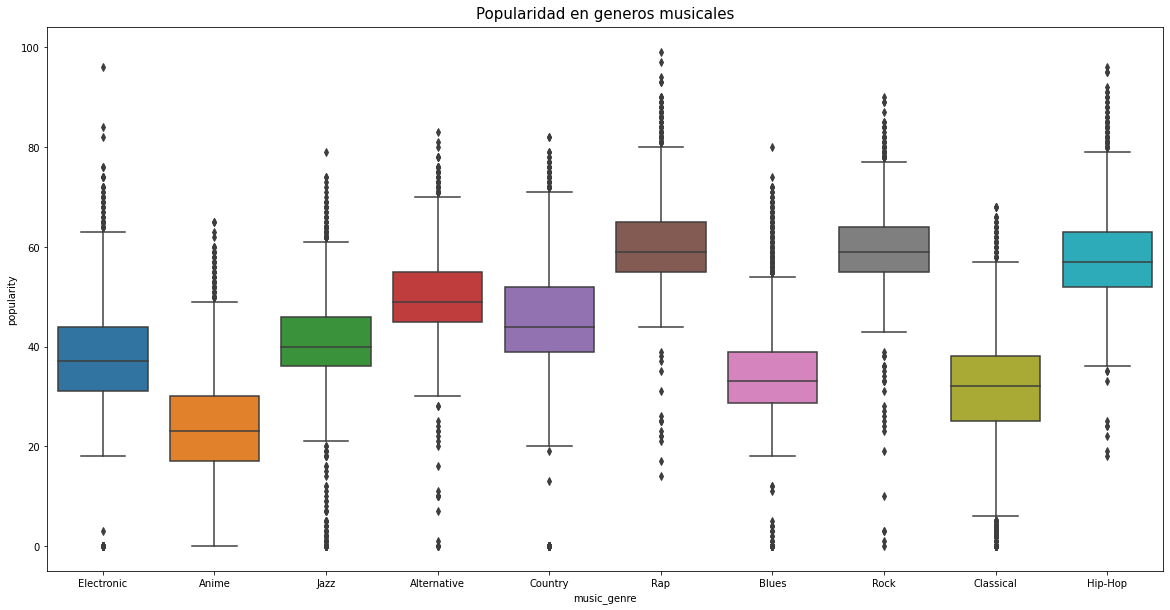

In [ ]:
#medimos la popularidad dentro de los generos musicales

plt.figure(figsize=(20,10))
sns.boxplot(x=dfs.index, y = 'popularity', data = dfs) 
plt.title("Popularidad en generos musicales", fontsize=15 , verticalalignment='bottom')
plt.show()

Al haberse observado una mayor popularidad en los géneros Hip-Hop, Rock y Rap, resultaría interesante indagar respecto a qué factor está relacionado a dicha popularidad superior. 

A su vez, resultaría interesante profundizar en la misma dirección, pero sobre aquellos géneros menos populares para corroborar si las principales variables que explican la mayor popularidad de los géneros antes mencionados, explican la menor variabilidad de géneros como Anime, Blues y Classical. 

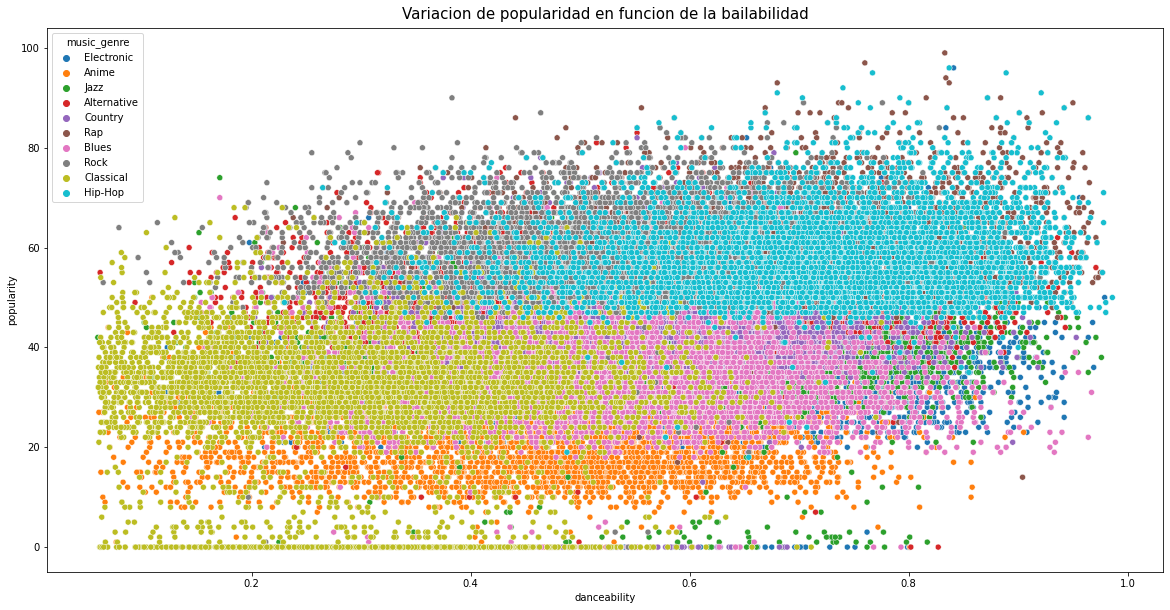

In [ ]:
# Importamos el DF sin indexar
df_raw = pd.read_csv(url)

#intentamos observar alguna tendencia respecto a la relacion bailabilidad-popularidad. 
plt.figure(figsize=(20,10))
sns.scatterplot(x='danceability', y = 'popularity', hue= 'music_genre',data = df_raw) 
plt.title("Variacion de popularidad en funcion de la bailabilidad", fontsize=15 , verticalalignment='bottom')
plt.show()

Aquí podemos observar que si bien géneros populares como el Hip-Hop cuentan con una alta bailabilidad, otros géneros que también cuentan con niveles similares de bailabilidad se encuentran entre aquellos menos populares (como Anime o Blues).

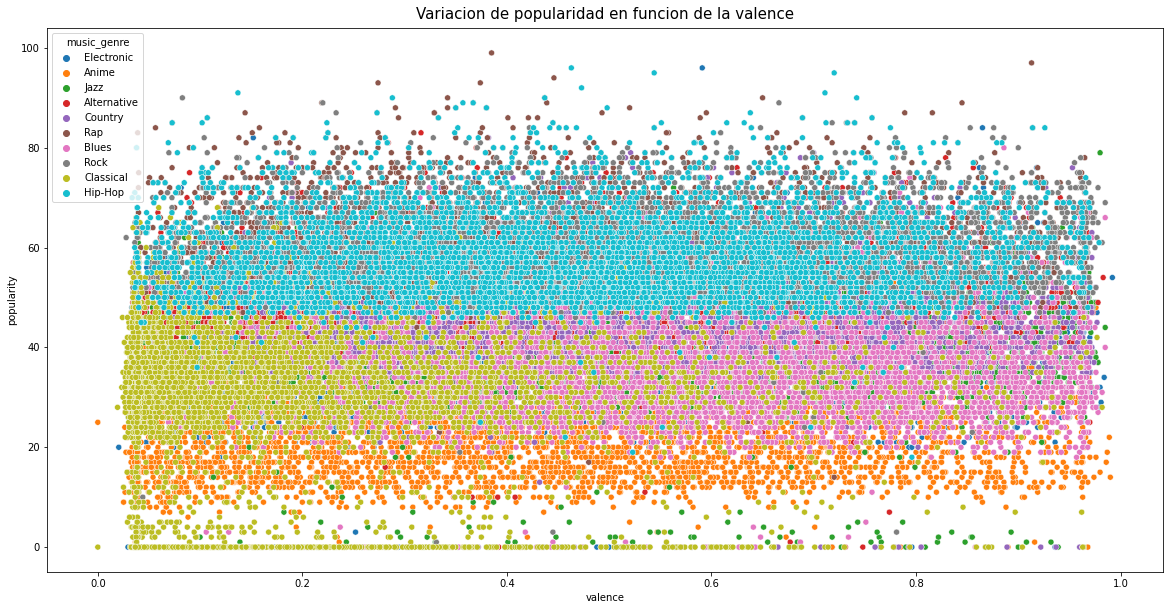

In [ ]:
#intentamos observar alguna tendencia respecto a la relacion bailabilidad-popularidad. 
plt.figure(figsize=(20,10))
sns.scatterplot(x='valence', y = 'popularity', hue= 'music_genre',data = df_raw) 
plt.title("Variacion de popularidad en funcion de la valence", fontsize=15 , verticalalignment='bottom')
plt.show()

Analizando la popularidad en función de la valencia vemos resultados similares a los observados en la anterior proposición. 

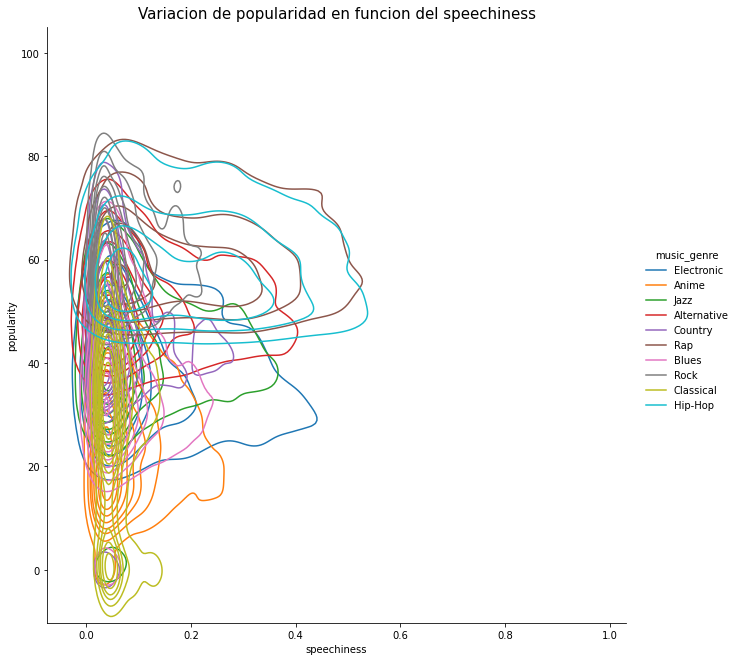

In [ ]:
#Intentamos observar alguna tendencia respecto a la relacion speechiness-popularidad.

sns.displot(x='speechiness', y = 'popularity', hue= 'music_genre',data = df_raw, kind='kde', height= 9) 
plt.title("Variacion de popularidad en funcion del speechiness", fontsize=15 , verticalalignment='bottom')
plt.show()

Cuando utilizamos el speechiness para observar cómo se comporta la popoularidad observamos algo ligeramente diferente. Y es que géneros como Hip-Hop, Alternative, Rap y Electronic tienen niveles de Speechiness que llegan a niveles mayores, pero no así otro género popular como Rock. 

In [ ]:
df_raw.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [ ]:
# Se crea un modelo de regresión que nos permita realizar una prueba estadística para corroborar si se pueden utilizar algunas de las variables del Dataset.

model1 = 'popularity~acousticness + danceability + duration_ms + energy + instrumentalness + key + liveness + loudness + mode + speechiness + valence' # este es el modelo incluyendo todas las variables.

lm1 = smf.ols(formula = model1, data = df_raw).fit()

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     727.6
Date:                Thu, 25 Aug 2022   Prob (F-statistic):               0.00
Time:                        12:49:02   Log-Likelihood:            -2.0145e+05
No. Observations:               50000   AIC:                         4.030e+05
Df Residuals:                   49978   BIC:                         4.031e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           46.7107      0.619  

Utilizando una exploración del modelo mediante una regresión lineal vemos que, con la información disponible en este DataSet, no se puede encontrar una variable que explique en buena medida los niveles de popularidad (ni siquiera incluyendo en el modelo todas las variables del DataSet). 

Es por esto que se propone buscar otro enfoque para el modelo y no intentar predecir cuán popular será una canción en base a los atributos aquí presentados. 

De todas maneras, luego de una segunda revisión se evaluó la posibilidad de tratar los outliers y chequear luego de esto si mejoran los niveles de R2 del modelo de regresión. 

In [ ]:
# Se tratan los outliers

A partir de este momento se comienza a trabajar para identificar otras oportunidades del DataSet.

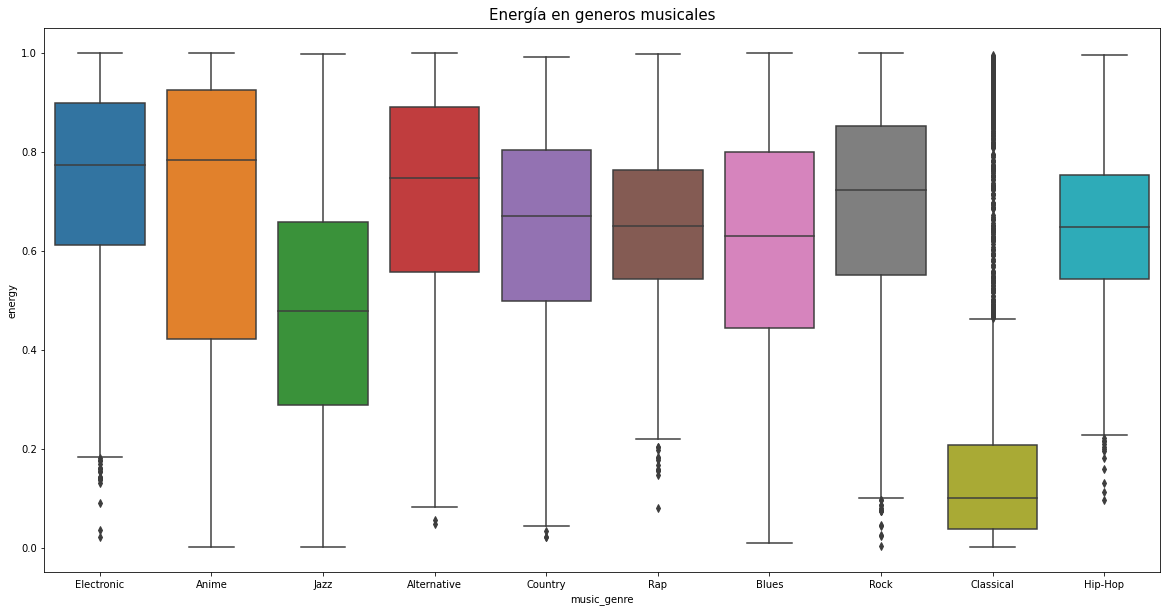

In [ ]:
#medimos los niveles de enegia musical dentro de los generos

plt.figure(figsize=(20,10))
sns.boxplot(x=dfs.index, y = 'energy', data = dfs) 
plt.title("Energía en generos musicales", fontsize=15 , verticalalignment='bottom')
plt.show()

Se explora los diferentes niveles de energía dentro de cada género. 

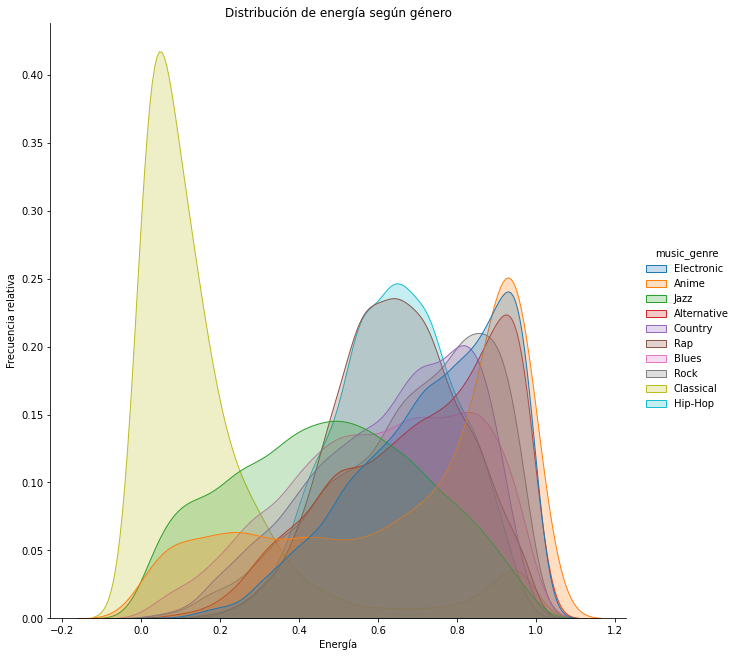

In [ ]:
# definimos un gráfico que nos muestre la cantidad de canciones (o composiciones) en relación a sus niveles de energía para mostrar la misma información de una manera más integrada.
df = sns.displot(data=df_raw, x='energy', kind= 'kde', hue= 'music_genre', fill=True, height = 9)

# personalizamos el gráfico
df.set(xlabel='Energía', ylabel='Frecuencia relativa', title='Distribución de energía según género')

Observando las diferencias en cuanto a la distribución de la variable Energía (energy) entre géneros musicales podemos observar algunas diferencias marcadas. 

Por un lado se observa una gran acumulación de composiciones pertenecientes al género Classical en un rango cercano a 0 de Energy. Por otro, el género jazz muestra una distribución acampanada con un pico intermedio entre los valores 0,4 y 0,6, mientras que ningun otro género presenta dicha característica.

Adicionalmente se observa que tanto Rap como Hip-Hop nuevamente se asemejan en sus niveles de energía, en este caso cercanos al 0,6. 

También se puede observar otro subgrupo de distribuciones pertenecientes a los géneros Rock y Country, con sus picos cercandos al 0,8 y sus distribuciones asimétricamente tendientes hacia este lado del gráfico. 

Por último, se puede diferenciar otro grupo de 3 géneros donde se ubican Anime, Electronic y Alternative. Estos 3 géneros presentan un pico muy marcado cercano al máximo de intensidad 1. 

Pero también presentan diferencias entre sí ya que el género Anime tiene una cantidad intermedia y muy constante de composiciones en todo el espectro de la variable y sólo aumenta drásticamente al acercarse al máximo. 

Por otro lado, Electronic y Alternative se muestran mucho más similares entre si con una cantidad de composiciones que comienza a aumentar muy progresivamente desde los niveles de 0,2 hasta llegar a su pico máximo de casi 1.

De esta manera se puede inferir que la variable Energy sería otra que nos permitiría añadir resolución a la hora de diferenciar géneros entre si y por lo tanto eventualmente predecir en qué categoría sería ubicada una canción nueva.

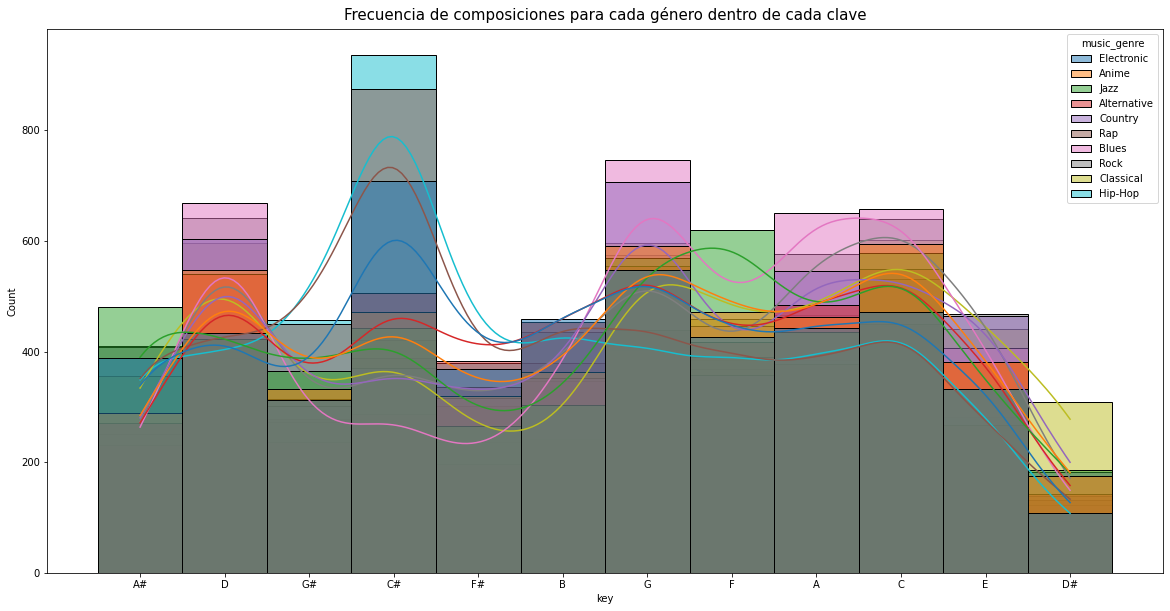

In [ ]:
# Aquí vemos la cantidad de composiciones, clasificadas por clave, y con detalle de cada género. 

plt.figure(figsize=(20,10))
sns.histplot(x='key', hue= 'music_genre', data= df_raw, kde= True) 
sns.set_palette("colorblind")
plt.title("Frecuencia de composiciones para cada género dentro de cada clave", fontsize=15 , verticalalignment='bottom')
plt.show()

Aportamos mayor resolución en cuanto a diferencias entre los géneros refiriéndonos a la clave en la cual están compuestos. 

En el gráfico se puede observar que géneros populares como Hip-Hop y Rap son aquellos que predominan en las composiciones en C# (Do sostenido). 

A su vez, el otro género popular mencionado, Rock figura bastante más distribuido a lo largo de la mayoría de las claves de composición y con comportamientos similares a Classical o Country.

En cuanto a los géneros menos populares mencionados vemos que Anime tiene una distribución similar a la del Rock, por lo que esta variable no sería útil para diferenciar entre estos dos géneros. Mientras que Classical muestra una diferenciación en el rango de G# a B, presentando menores niveles que los demás mencionados. 

Blues presenta un comportamiento similar a Classical, y luego predomina por sobre la mayoría de géneros en composiciones que oscilan entre G hasta C. 

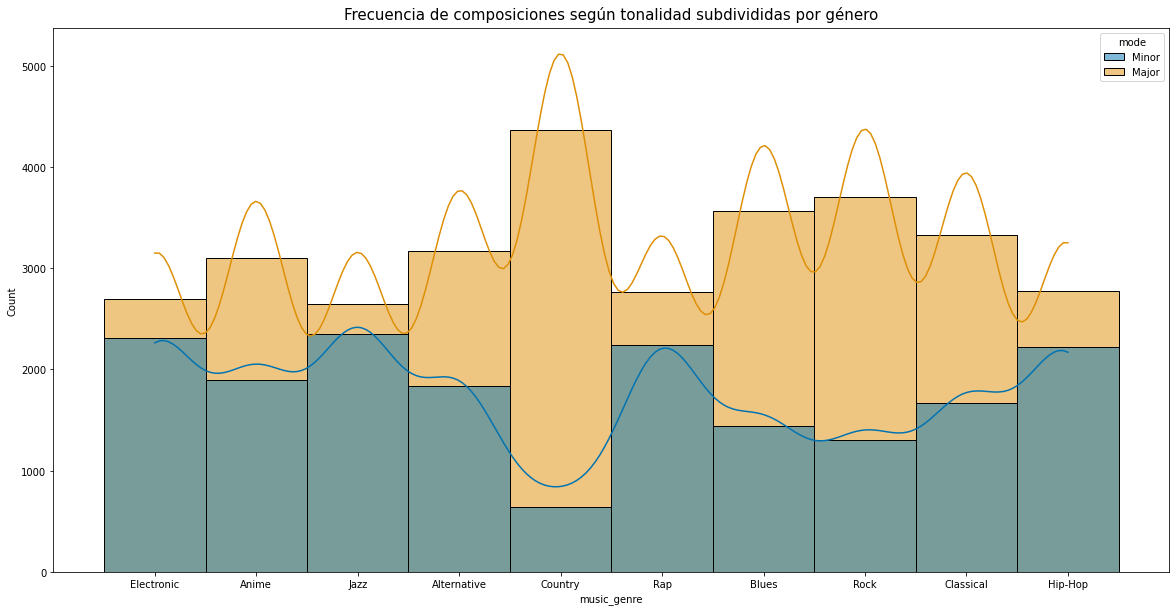

In [ ]:
#medimos la frecuencia de composiciones según la tonalidad dividido por cada género.

plt.figure(figsize=(20,10))
sns.histplot(x='music_genre', hue= 'mode', kde= True, data= df_raw) 
sns.set_palette("colorblind")
plt.title("Frecuencia de composiciones según tonalidad subdivididas por género", fontsize=15 , verticalalignment='bottom')
plt.show()

Aquí vemos que el género Rock, el cual nos resultaba difícil de diferenciar de los 3 elegidos como "menos populares", se diferencia de Classical y Anime por sus proporciones de composiciones tanto en modo Menor como modo Mayor, por lo que nuevamente esta medida aportaría resolución. 

Dicho esto, se puede observar que un género que gana mucha resolución es también Country, el cual se observaba similar a Rock en cuanto a las claves de composición, pero en cuanto a los modos se puede observar que presenta sustancialmente menor cantidad de composiciones en modo menor y lo inverso sucede con aquellas compuestas en modo Mayor. 

Por su parte, Blues en este caso presenta niveles muy similares al Rock, lo cual puede responder a sus orígenes, recordemos que Blues es un género que da origen a lo que luego se convertiría en Rock. 

En cuanto a Rap y Hip-Hop vemos que ambos se mantienen en un rango más bien intermedio en cuento a cantidad de composiciones en modalidad Menor, lo mismo sucede con aquellas en modalidad Mayor, y a su vez son muy similares entre sí. 

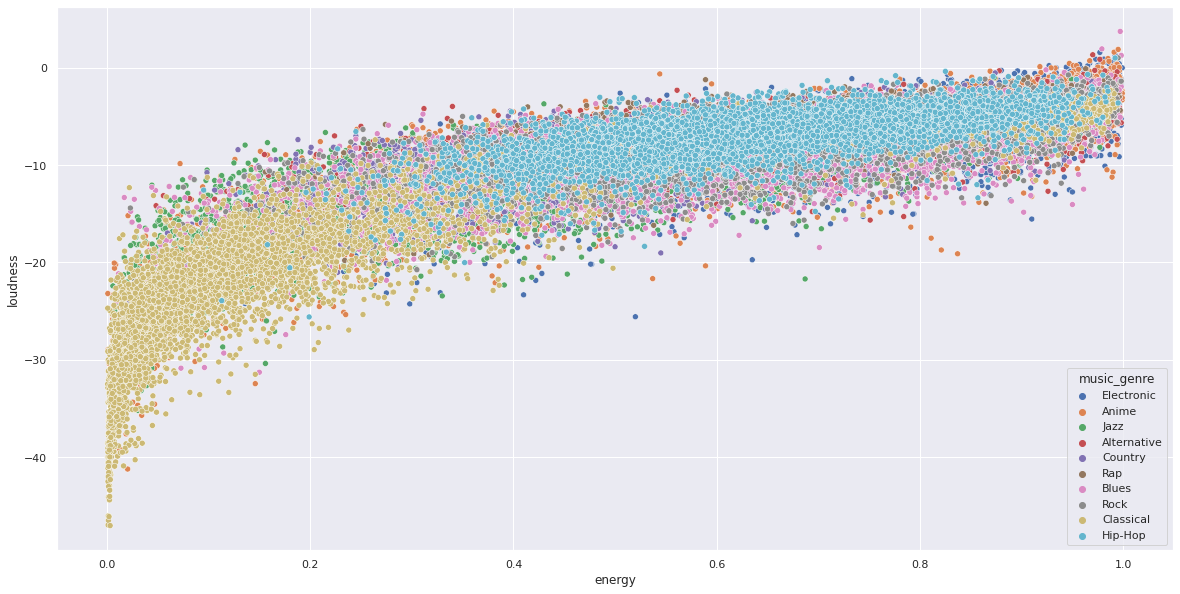

In [ ]:
# Se crea un gráfico que muestre la relación entre la energía de las canciones y el volumen (o loudness)

sns.set(rc = {'figure.figsize':(20,10)})
ene_vs_loud = sns.scatterplot(data=df_raw, x="energy", y="loudness", hue="music_genre") 

La relacion entre "energy" con la intensidad de sonido "loudness" aumentan positivamente al comienzo de la distribución, para luego no presentar el mismo nivel de aumento de intensidad para mayores niveles de Energía.

Esta tabla de dispersion muestra un nivel directamente proporcional en tanto a mayor nivel de volumen (decibeles acercandose a numeros positivos) mayor es el nivel de energía en canciones de todos los generos.

# Conclusión

En primera instancia se exploró la hipótesis de predecir los niveles de popularidad de las canciones incluidas en nuestro dataset en base a las variables incluidas en el mismo. Luego de la formulación de un modelo de regresión lineal se concluye que no es posible realizarlo con una regresión ya que ni siquiera cuando se incluyeron todas las variables del Dataset se obtenía un nivel de correlación (R2) mayor al 25%.

Luego, habiendo identificado algunos géneros como aquellos más populares y otros como aquellos menos populares, se comenzaron a identificar algunas variables que pudieran servir para diferenciarlos. 

Se observó que por un lado, la cantidad relativa de composiciones, tanto en distintas claves como en distintas tonalidades (o modo) cambiaba según el género.

Luego, se observó que las distribuciones de energía (energy) también presentaban algunas diferencias entre géneros, algo que a su vez aporta mayores posibilidades a la hora de diferenciarlos entre sí. 

De esta manera se plantea que se podría intentar identificar si existen más variables que expliquen estas diferencias, quizá utilizando gráficos de radar para una visualización simultánea facilitada, para luego intentar un modelo de regresión que permita explicar la asignación del género musical en base a estar principales variables diferenciales previamente trabajadas. 

Por última vez se intentó aplicar un método de reducción dimensional al modelo de regresión que intentaba predecir los niveles de popularidad:

In [ ]:
# Se crean variables X e y para metodos de reducción dimensional
df_1 = pd.read_csv(url)

y = df_1['popularity']
X = df_1.drop(['popularity','artist_name','instance_id','track_name','obtained_date','tempo'],  1)

X

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,valence,music_genre
0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,0.759,Electronic
1,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,0.531,Electronic
2,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,0.333,Electronic
3,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,0.270,Electronic
4,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...
50000,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,0.330,Hip-Hop
50001,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,0.113,Hip-Hop
50002,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,0.395,Hip-Hop
50003,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,0.354,Hip-Hop


In [ ]:
np.asarray(X)

array([[0.00468, 0.652, -1.0, ..., 0.0748, 0.759, 'Electronic'],
       [0.0127, 0.622, 218293.0, ..., 0.03, 0.531, 'Electronic'],
       [0.00306, 0.62, 215613.0, ..., 0.0345, 0.3329999999999999,
        'Electronic'],
       ...,
       [0.00597, 0.693, 189483.0, ..., 0.146, 0.395, 'Hip-Hop'],
       [0.0831, 0.782, 262773.0, ..., 0.0441, 0.354, 'Hip-Hop'],
       [0.102, 0.862, 267267.0, ..., 0.1009999999999999, 0.765,
        'Hip-Hop']], dtype=object)

In [ ]:
X.isnull().sum()

acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
valence             5
music_genre         5
dtype: int64

In [ ]:
# Reemplazamos los valores que son nulos por ceros ya que consideramos que 5 valores resultan despreciables entre más de 50.000, de esta manera los métodos pueden trabajar con el formato del dataset. Sino los reconocen con in formato incorrecto.

X.replace(np.nan, 0, inplace=True)
X.isnull().sum()

acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
valence             0
music_genre         0
dtype: int64

In [ ]:
# Transformamos en dummies las variables en formato string que sirvan para clasificar, de esta manera se pueden incluir en el análisis.

X_1 = pd.get_dummies(X)
X_1

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence,key_0,...,music_genre_Alternative,music_genre_Anime,music_genre_Blues,music_genre_Classical,music_genre_Country,music_genre_Electronic,music_genre_Hip-Hop,music_genre_Jazz,music_genre_Rap,music_genre_Rock
0,0.00468,0.652,-1.0,0.941,0.79200,0.115,-5.201,0.0748,0.759,0,...,0,0,0,0,0,1,0,0,0,0
1,0.01270,0.622,218293.0,0.890,0.95000,0.124,-7.043,0.0300,0.531,0,...,0,0,0,0,0,1,0,0,0,0
2,0.00306,0.620,215613.0,0.755,0.01180,0.534,-4.617,0.0345,0.333,0,...,0,0,0,0,0,1,0,0,0,0
3,0.02540,0.774,166875.0,0.700,0.00253,0.157,-4.498,0.2390,0.270,0,...,0,0,0,0,0,1,0,0,0,0
4,0.00465,0.638,222369.0,0.587,0.90900,0.157,-6.266,0.0413,0.323,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50000,0.03340,0.913,-1.0,0.574,0.00000,0.119,-7.022,0.2980,0.330,0,...,0,0,0,0,0,0,1,0,0,0
50001,0.15700,0.709,251860.0,0.362,0.00000,0.109,-9.814,0.0550,0.113,0,...,0,0,0,0,0,0,1,0,0,0
50002,0.00597,0.693,189483.0,0.763,0.00000,0.143,-5.443,0.1460,0.395,0,...,0,0,0,0,0,0,1,0,0,0
50003,0.08310,0.782,262773.0,0.472,0.00000,0.106,-5.016,0.0441,0.354,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Se corrobora el formato como array de X_1

np.asarray(X_1)

array([[ 4.68000e-03,  6.52000e-01, -1.00000e+00, ...,  0.00000e+00,
         0.00000e+00,  0.00000e+00],
       [ 1.27000e-02,  6.22000e-01,  2.18293e+05, ...,  0.00000e+00,
         0.00000e+00,  0.00000e+00],
       [ 3.06000e-03,  6.20000e-01,  2.15613e+05, ...,  0.00000e+00,
         0.00000e+00,  0.00000e+00],
       ...,
       [ 5.97000e-03,  6.93000e-01,  1.89483e+05, ...,  0.00000e+00,
         0.00000e+00,  0.00000e+00],
       [ 8.31000e-02,  7.82000e-01,  2.62773e+05, ...,  0.00000e+00,
         0.00000e+00,  0.00000e+00],
       [ 1.02000e-01,  8.62000e-01,  2.67267e+05, ...,  0.00000e+00,
         0.00000e+00,  0.00000e+00]])

In [ ]:
# Se corrobora el formato como array de y

y

0        27.0
1        31.0
2        28.0
3        34.0
4        32.0
         ... 
50000    59.0
50001    72.0
50002    51.0
50003    65.0
50004    67.0
Name: popularity, Length: 50005, dtype: float64

In [ ]:
# Utilizando método Stepwise para reducción dimensional

# creamos una función para que realice este proceso.
# la función necesita cuatro parametros y minimamente dos, data y target
# el tercero y cuarto es opcional, si no se da se toman los valores predefinidos

def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [ ]:
backward_elimination(X_1, y)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


['acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'valence',
 'key_0',
 'key_A',
 'key_A#',
 'key_B',
 'key_C',
 'key_C#',
 'key_D',
 'key_D#',
 'key_E',
 'key_F',
 'key_F#',
 'key_G',
 'key_G#',
 'mode_0',
 'mode_Major',
 'mode_Minor',
 'music_genre_0',
 'music_genre_Alternative',
 'music_genre_Anime',
 'music_genre_Blues',
 'music_genre_Classical',
 'music_genre_Country',
 'music_genre_Electronic',
 'music_genre_Hip-Hop',
 'music_genre_Jazz',
 'music_genre_Rap',
 'music_genre_Rock']

In [ ]:
# creamos una función para que realice este proceso.
# la función necesita tres parametros y minimamente dos, data y target
# el tercero es opcional, si no se da se toma el valor predefinido SL=0.01
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
forward_selection(X_1, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':


[]

In [ ]:
# creamos una función para que realice este proceso.
# la función necesita cuatro parametros y minimamente dos, data y target
# el tercero y cuarto es opcional, si no se da se toman los valores predefinidos

def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [ ]:
stepwise_selection(X_1, y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


[]

Nuestra interpretación hasta aquí es bastante similar a la resultante luego de realizar la prueba del estadístico T con la variable dependiente Popularity. 

Se observa que luego de utilizar los métodos de reducción dimensionales, tanto en Stepwise como en Forward selection, dichos métodos no seleccionan ninguna de las dimensiones como significativas a la hora de predecir el comportamiento de la variable dependiente. 

Como contraparte, cuando se utiliza el método Backards selection, todas las dimensiones quedan seleccionadas, indicando que ninguna cumple con el requisito de ser lo suficientemente "poco" significativa como para excluirla del modelo. 

Esto nuevamente es indicador de que nuestros datos serían insuficientes a la hora de intentar predecir la variable Popularity.

In [ ]:
# Definiremos un nuevo DataFrame básico, con las características del DataSet original.

df_1 = pd.read_csv(url)

A partir de este momento se comienza a trabajar en un modelo de clasifcación.

In [ ]:
# Intentaremos resolver un problema de clasificación, para ello intentaremos entrenar a un modelo para que logre clasificar exitosamente los géneros musicales. 

from sklearn.ensemble import RandomForestClassifier # Usaremos como clasificador un bosque aleatorio
from sklearn.model_selection import train_test_split # vamos a separar nuestro dataset
from sklearn import metrics # vamos a medir el desempeño
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# definimos matriz de diseño X y vector respuesta y. Al vector respuesta y debemos transformarlo, ya que contiene una clasificación que utiliza Strings, por lo que les asignaremos un número a cada género musical.
X_gen = df_1.drop(['music_genre','artist_name','instance_id','track_name','obtained_date','tempo'], 1)
X_gen = pd.get_dummies(X_gen)
X_gen.replace(np.nan, 0, inplace=True)

df_2 = df_1
copia = df_2

copia['music_genre'].replace('Electronic', 0, inplace=True)
copia['music_genre'].replace('Alternative', 1, inplace=True)
copia['music_genre'].replace('Anime', 2, inplace=True)
copia['music_genre'].replace('Blues', 3, inplace=True)
copia['music_genre'].replace('Classical', 4, inplace=True)
copia['music_genre'].replace('Country', 5, inplace=True)
copia['music_genre'].replace('Hip-Hop', 6, inplace=True)
copia['music_genre'].replace('Jazz', 7, inplace=True)
copia['music_genre'].replace('Rap', 8, inplace=True)
copia['music_genre'].replace('Rock', 9, inplace=True)
copia['music_genre'].replace(np.nan, 10, inplace=True)

y_gen = abs(pd.Series(copia['music_genre']))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if sys.path[0] == '':


In [ ]:
# Separamos en entrenamiento/test en razon 80/20 %
X_gen_train, X_gen_test, y_gen_train, y_gen_test = train_test_split(X_gen,y_gen,test_size=0.2, random_state=1)

# Creamos un modelo Random Forest con parametros por defect
modelo = RandomForestClassifier(random_state=1)
modelo.fit(X_gen_train, y_gen_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(X_gen_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1440x1080 with 0 Axes>

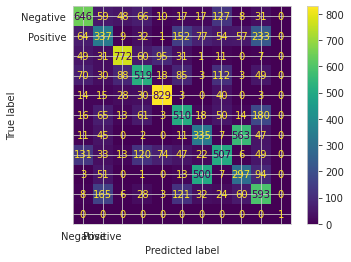

In [ ]:
# Ploteamos la matriz de confusión. Se debe tener en cuenta que hay una cantidad mucho mayor de posibles negativos y positivos junto con sus correspondientes "falsos".

plt.figure(figsize=(20,15))
metrics.plot_confusion_matrix(modelo, X_gen_test, y_gen_test, display_labels=['Negative', 'Positive'])

En este caso, la matriz de confusión resulta un tanto complicada de comprender ya que al haber tantas combinaciones posibles entre verdaderos y falsos, tanto positivos como negativos, sería preferible utilizar una métrica un poco más resumida. 

In [ ]:
# Procediendo con accuracy:

accuracy = metrics.accuracy_score(y_gen_test, preds)
accuracy 

0.5345465453454654

In [ ]:
# Todas las metricas en uno:

print(metrics.classification_report(y_gen_test, preds))

              precision    recall  f1-score   support

         0.0       0.64      0.63      0.63      1029
         1.0       0.41      0.33      0.36      1016
         2.0       0.79      0.73      0.76      1057
         3.0       0.56      0.53      0.55       977
         4.0       0.80      0.86      0.83       962
         5.0       0.52      0.55      0.53       930
         6.0       0.33      0.33      0.33      1021
         7.0       0.54      0.51      0.52      1002
         8.0       0.29      0.31      0.30       966
         9.0       0.46      0.57      0.51      1040
        10.0       1.00      1.00      1.00         1

    accuracy                           0.53     10001
   macro avg       0.58      0.58      0.58     10001
weighted avg       0.54      0.53      0.53     10001



Por otro lado, se nos ocurrió que podíamos explorar los métodos de reducción dimensional para estas nuevas variables X e Y, y corroborar si aplicarlos mejoraba en algo el desempeño del modelo de clasifcación.

In [ ]:
# Corremos el método de reducción dimensional Stepwise con la variable y_gen (target) ya constituída, la cual representa los distintos géneros musicales y ahora nos devuelve un resultado. 

stepwise_selection(X_gen, y_gen)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


['popularity',
 'energy',
 'valence',
 'instrumentalness',
 'acousticness',
 'speechiness',
 'danceability',
 'mode_Minor',
 'mode_Major',
 'key_F#',
 'key_B',
 'key_G',
 'loudness',
 'liveness']

In [ ]:
# Se procede a generar una nueva variable X para clasificar con el método de random forest y chequear si ha cambiado algo al eliminar algunas de las variables. 

X_def = X_gen.drop(['duration_ms','key_A', 'key_A#', 'key_C', 'key_C#', 'key_D', 'key_D#', 'key_E', 'key_F', 'key_G#'], 1)

# Separamos en entrenamiento/test en razon 80/20 %
X_def_train, X_def_test, y_gen_train, y_gen_test = train_test_split(X_def,y_gen,test_size=0.2, random_state=1)

# Creamos un modelo Random Forest con parametros por defect
modelo1 = RandomForestClassifier(random_state=1)
modelo1.fit(X_def_train, y_gen_train)
# Obtenemos las predicciones del modelo con X_test
preds1 = modelo1.predict(X_def_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Todas las metricas en uno
print(metrics.classification_report(y_gen_test, preds1))

              precision    recall  f1-score   support

         0.0       0.62      0.62      0.62      1029
         1.0       0.41      0.33      0.37      1016
         2.0       0.77      0.70      0.73      1057
         3.0       0.57      0.52      0.54       977
         4.0       0.81      0.85      0.83       962
         5.0       0.48      0.54      0.51       930
         6.0       0.33      0.32      0.32      1021
         7.0       0.52      0.50      0.51      1002
         8.0       0.29      0.30      0.29       966
         9.0       0.46      0.57      0.51      1040
        10.0       1.00      1.00      1.00         1

    accuracy                           0.52     10001
   macro avg       0.57      0.57      0.57     10001
weighted avg       0.53      0.52      0.52     10001



Habiendo eliminado las dimensiones no incluidas en el método stepwise observamos que no habría mayores ventajas, al menos a la hora de medir Accuracy, ya que se observa un nivel de 0.52, contra uno de 0.53 en el caso anterior.

Podemos sugerir entonces intentar indagar sobre otros métodos de clasificación distintos a Random Forest para corroborar si alguno de ellos tiene un éxito mayor a la hora de comprender y predecir nuestros datos, traduciéndose esto en una accuracy mayor. 

También se sugiere profundizar sobre el uso de Random forest una vez ajustados los valores outliers de nuestro DataSet.
